In [61]:
import rioxarray
import xarray
import matplotlib.pyplot as plt
import numpy as np

In [62]:
# Filepath
fn = "/home/wesley/Downloads/DatasetsTutorials/NetCDF4Data/zipped_file.nc"

# Rea data
pr = rioxarray.open_rasterio(fn) 

In [24]:
pr.variables

Frozen({'y': <xarray.IndexVariable 'y' (y: 360)>
array([ 89.75,  89.25,  88.75, ..., -88.75, -89.25, -89.75]), 'x': <xarray.IndexVariable 'x' (x: 720)>
array([-179.75, -179.25, -178.75, ...,  178.75,  179.25,  179.75]), 'time': <xarray.IndexVariable 'time' (time: 1452)>
array([cftime.DatetimeGregorian(1901, 1, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1901, 2, 15, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1901, 3, 16, 0, 0, 0, 0, has_year_zero=False),
       ...,
       cftime.DatetimeGregorian(2021, 10, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 11, 16, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(2021, 12, 16, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Attributes:
    long_name:  time, 'spatial_ref': <xarray.Variable ()>
array(0)
Attributes:
    GeoTransform:  -180.0 0.5 0.0 90.0 0.0 -0.5, 'pre': <xarray.Variable (time: 1452, y: 360, x: 720)>
[376358400 values with dt

In [60]:
# Get precipitation data

pr = pr['pre']

KeyError: 'pre'

In [4]:
# Let's see the dimessions of dataset
pr.dims

('time', 'y', 'x')

In [5]:
# Let's see the coordinates
pr.coords

Coordinates:
  * y            (y) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * x            (x) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * time         (time) object 1901-01-16 00:00:00 ... 2021-12-16 00:00:00
    spatial_ref  int64 0

In [27]:
# Let's see the atributes
pr.attrs["units"] = "mm/month"
pr.attrs

{'correlation_decay_distance': 450,
 'long_name': 'precipitation',
 'missing_value': 9.96921e+36,
 'units': 'mm/month',
 '_FillValue': 9.969209968386869e+36,
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [7]:
# See a slice of the data
pr[1200, 100:105, 415:420]

<xarray.DataArray 'pre' (y: 5, x: 5)>
array([[49.8     , 40.5     , 36.4     , 38.2     , 26.800001],
       [50.      , 42.4     , 45.5     , 42.100002, 31.      ],
       [45.8     , 46.2     , 43.7     , 36.600002, 31.9     ],
       [61.600002, 54.5     , 45.4     , 40.8     , 28.7     ],
       [71.6     , 72.1     , 68.8     , 48.8     , 35.7     ]], dtype=float32)
Coordinates:
  * y            (y) float64 39.75 39.25 38.75 38.25 37.75
  * x            (x) float64 27.75 28.25 28.75 29.25 29.75
    time         object 2001-01-16 00:00:00
    spatial_ref  int64 0
Attributes:
    correlation_decay_distance:  450
    long_name:                   precipitation
    missing_value:               9.96921e+36
    units:                       mm/month
    _FillValue:                  9.969209968386869e+36
    scale_factor:                1.0
    add_offset:                  0.0

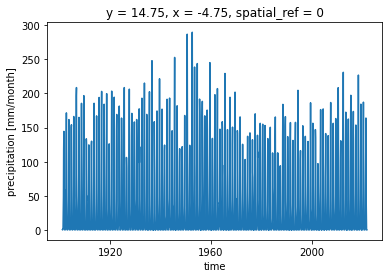

In [14]:
(pr[:, 150, 350]).plot()

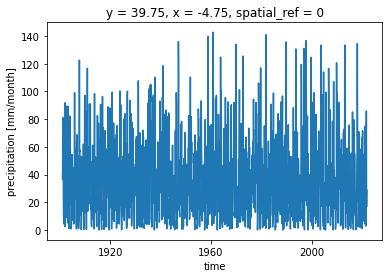

In [18]:
(pr[:, 100, 350]).plot()

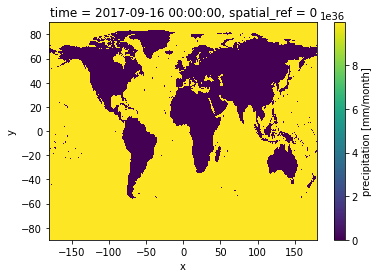

In [28]:
# [time, y:latitude, x:longitude]
pr[1400, :, :].plot()

### Get a slice of the data

In [40]:
lat = pr['y'][:]
lon = pr['x'][:]
sel_lat, sel_lon = [-80, 12], [-86, -34]
sel_lat_idx = np.where((lat >= sel_lat[0]) & (lat <= sel_lat[1]))
sel_lon_idx = np.where((lon >= sel_lon[0]) & (lon <= sel_lon[1]))

In [52]:
pr_sel = pr[:, sel_lat_idx[0], sel_lon_idx[0]]

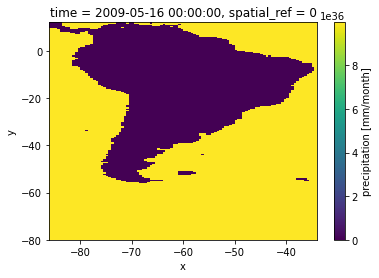

In [54]:
pr_sel[1300, :, :].plot()

In [56]:
# Remove Missing values

pr_masked = pr_sel.where(pr_sel != pr_sel.attrs['missing_value'])

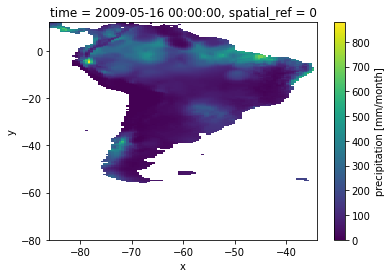

In [57]:
pr_masked[1300, :, :].plot()

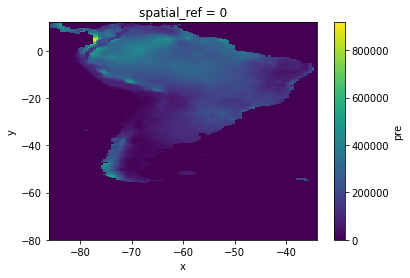

In [58]:
pr_masked.sum(dim="time").plot()